# Importações

In [17]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from tensorflow import keras

# Preparar Dados

In [2]:
h = pd.read_csv('EURUSD_Candlestick_1_Hour_BID_31.12.2018-09.02.2024.csv')
o = pd.read_csv('BRENT.CMDUSD_Candlestick_1_Hour_BID_31.12.2018-09.02.2024.csv')

In [3]:
df_oil = pd.DataFrame(o)
display(df_oil.head())
display(df_oil.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2019 00:00:00.000,53.791,53.791,53.791,53.791,0.0
1,01.01.2019 01:00:00.000,53.791,53.791,53.791,53.791,0.0
2,01.01.2019 02:00:00.000,53.791,53.791,53.791,53.791,0.0
3,01.01.2019 03:00:00.000,53.791,53.791,53.791,53.791,0.0
4,01.01.2019 04:00:00.000,53.791,53.791,53.791,53.791,0.0


,Gmt time,Open,High,Low,Close,Volume
44803,10.02.2024 19:00:00.000,81.927,81.927,81.927,81.927,0.0
44804,10.02.2024 20:00:00.000,81.927,81.927,81.927,81.927,0.0
44805,10.02.2024 21:00:00.000,81.927,81.927,81.927,81.927,0.0
44806,10.02.2024 22:00:00.000,81.927,81.927,81.927,81.927,0.0
44807,10.02.2024 23:00:00.000,81.927,81.927,81.927,81.927,0.0


In [4]:
df_eur_usd = pd.DataFrame(h)
display(df_eur_usd.head())
display(df_eur_usd.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2019 00:00:00.000,1.14627,1.14627,1.14627,1.14627,0.0
1,01.01.2019 01:00:00.000,1.14627,1.14627,1.14627,1.14627,0.0
2,01.01.2019 02:00:00.000,1.14627,1.14627,1.14627,1.14627,0.0
3,01.01.2019 03:00:00.000,1.14627,1.14627,1.14627,1.14627,0.0
4,01.01.2019 04:00:00.000,1.14627,1.14627,1.14627,1.14627,0.0


,Gmt time,Open,High,Low,Close,Volume
44803,10.02.2024 19:00:00.000,1.07821,1.07821,1.07821,1.07821,0.0
44804,10.02.2024 20:00:00.000,1.07821,1.07821,1.07821,1.07821,0.0
44805,10.02.2024 21:00:00.000,1.07821,1.07821,1.07821,1.07821,0.0
44806,10.02.2024 22:00:00.000,1.07821,1.07821,1.07821,1.07821,0.0
44807,10.02.2024 23:00:00.000,1.07821,1.07821,1.07821,1.07821,0.0


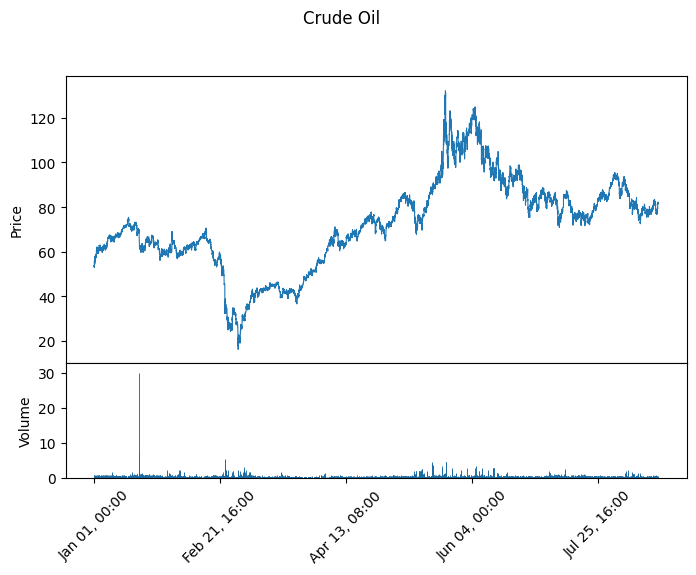

In [5]:
oil = df_oil.copy()
oil.index = pd.to_datetime(oil['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

oil = oil.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

mc = mpf.make_marketcolors(up='g', down='r', wick='inherit', edge='inherit')
s = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='line', volume=True, figratio=(12,8), figscale=1.0, style=s, title='Crude Oil', warn_too_much_data=10000000)

mpf.plot(oil, **kwargs)

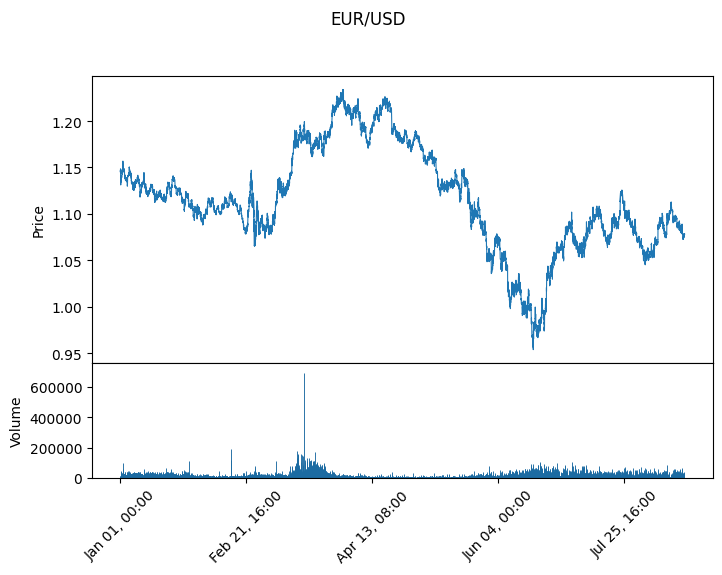

In [6]:
eur_usd = df_eur_usd.copy()
eur_usd.index = pd.to_datetime(eur_usd['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

eur_usd = eur_usd.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

mc = mpf.make_marketcolors(up='g', down='r', wick='inherit', edge='inherit')
s = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='line', volume=True, figratio=(12,8), figscale=1.0, style=s, title='EUR/USD', warn_too_much_data=10000000)

mpf.plot(eur_usd, **kwargs)

In [7]:
# Colocando a data como index
df_oil['datetime'] = pd.to_datetime(df_oil['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
df_oil = df_oil.set_index(df_oil['datetime'])
df_oil.index.names = [None]
df_oil = df_oil.drop(df_oil[df_oil['Volume'] == 0].index)
df_oil

,Gmt time,Open,High,Low,Close,Volume,datetime
2019-01-02 01:00:00,02.01.2019 01:00:00.000,54.118,54.376,53.651,53.761,0.1989,2019-01-02 01:00:00
2019-01-02 02:00:00,02.01.2019 02:00:00.000,53.741,53.821,53.315,53.451,0.1602,2019-01-02 02:00:00
2019-01-02 03:00:00,02.01.2019 03:00:00.000,53.466,53.571,53.335,53.361,0.0840,2019-01-02 03:00:00
2019-01-02 04:00:00,02.01.2019 04:00:00.000,53.355,53.361,53.085,53.235,0.1106,2019-01-02 04:00:00
2019-01-02 05:00:00,02.01.2019 05:00:00.000,53.241,53.341,52.796,53.011,0.1626,2019-01-02 05:00:00
...,...,...,...,...,...,...,...
2024-02-09 17:00:00,09.02.2024 17:00:00.000,82.063,82.153,81.823,81.983,0.2621,2024-02-09 17:00:00
2024-02-09 18:00:00,09.02.2024 18:00:00.000,81.973,82.048,81.873,81.973,0.1857,2024-02-09 18:00:00
2024-02-09 19:00:00,09.02.2024 19:00:00.000,81.963,82.233,81.903,81.948,0.2311,2024-02-09 19:00:00
2024-02-09 20:00:00,09.02.2024 20:00:00.000,81.943,81.958,81.843,81.918,0.0707,2024-02-09 20:00:00


In [8]:
# Colocando a data como index
df_eur_usd['datetime'] = pd.to_datetime(df_eur_usd['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
df_eur_usd = df_eur_usd.set_index(df_eur_usd['datetime'])
df_eur_usd.index.names = [None]
df_eur_usd = df_eur_usd.drop(df_eur_usd[df_eur_usd['Volume'] == 0].index)
df_eur_usd

,Gmt time,Open,High,Low,Close,Volume,datetime
2019-01-01 22:00:00,01.01.2019 22:00:00.000,1.14598,1.14672,1.14598,1.14606,2354.3101,2019-01-01 22:00:00
2019-01-01 23:00:00,01.01.2019 23:00:00.000,1.14605,1.14676,1.14566,1.14612,9464.5898,2019-01-01 23:00:00
2019-01-02 00:00:00,02.01.2019 00:00:00.000,1.14612,1.14626,1.14543,1.14561,7151.4399,2019-01-02 00:00:00
2019-01-02 01:00:00,02.01.2019 01:00:00.000,1.14561,1.14563,1.14457,1.14521,11411.6602,2019-01-02 01:00:00
2019-01-02 02:00:00,02.01.2019 02:00:00.000,1.14521,1.14533,1.14426,1.14456,14688.4697,2019-01-02 02:00:00
...,...,...,...,...,...,...,...
2024-02-09 17:00:00,09.02.2024 17:00:00.000,1.07816,1.07866,1.07792,1.07855,7360.3600,2024-02-09 17:00:00
2024-02-09 18:00:00,09.02.2024 18:00:00.000,1.07856,1.07908,1.07855,1.07866,6030.8100,2024-02-09 18:00:00
2024-02-09 19:00:00,09.02.2024 19:00:00.000,1.07865,1.07877,1.07813,1.07825,3714.7400,2024-02-09 19:00:00
2024-02-09 20:00:00,09.02.2024 20:00:00.000,1.07824,1.07880,1.07797,1.07863,3950.0900,2024-02-09 20:00:00


In [9]:
df_oil = df_oil.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]

df_oil = df_oil.rename(columns={'Open': 'Open_oil', 'High': 'High_oil', 'Low':'Low_oil', 'Close':'Close_oil', 'Volume':'Volume_oil'})
df_oil = df_oil.drop(df_oil[df_oil['Volume_oil'] == 0].index)
df_oil.tail()

,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2024-02-09 17:00:00,82.063,82.153,81.823,81.983,0.2621
2024-02-09 18:00:00,81.973,82.048,81.873,81.973,0.1857
2024-02-09 19:00:00,81.963,82.233,81.903,81.948,0.2311
2024-02-09 20:00:00,81.943,81.958,81.843,81.918,0.0707
2024-02-09 21:00:00,81.908,81.947,81.847,81.927,0.1033


In [10]:
df_eur_usd = df_eur_usd.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]

df_eur_usd = df_eur_usd.rename(columns={'Open': 'Open_eur_usd', 'High': 'High_eur_usd', 'Low':'Low_eur_usd', 'Close':'Close_eur_usd', 'Volume':'Volume_eur_usd'})
df_eur_usd = df_eur_usd.drop(df_eur_usd[df_eur_usd['Volume_eur_usd'] == 0].index)
df_eur_usd.tail()

,Open_eur_usd,High_eur_usd,Low_eur_usd,Close_eur_usd,Volume_eur_usd
2024-02-09 17:00:00,1.07816,1.07866,1.07792,1.07855,7360.36
2024-02-09 18:00:00,1.07856,1.07908,1.07855,1.07866,6030.81
2024-02-09 19:00:00,1.07865,1.07877,1.07813,1.07825,3714.74
2024-02-09 20:00:00,1.07824,1.07880,1.07797,1.07863,3950.09
2024-02-09 21:00:00,1.07862,1.07885,1.07821,1.07821,5024.63


In [11]:
df = pd.concat([df_eur_usd,df_oil],axis=1, join='inner')
df.head()

,Open_eur_usd,High_eur_usd,Low_eur_usd,Close_eur_usd,Volume_eur_usd,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2019-01-02 01:00:00,1.14561,1.14563,1.14457,1.14521,11411.6602,54.118,54.376,53.651,53.761,0.1989
2019-01-02 02:00:00,1.14521,1.14533,1.14426,1.14456,14688.4697,53.741,53.821,53.315,53.451,0.1602
2019-01-02 03:00:00,1.14456,1.14487,1.14446,1.14457,5987.1001,53.466,53.571,53.335,53.361,0.0840
2019-01-02 04:00:00,1.14456,1.14468,1.14426,1.14449,8056.6899,53.355,53.361,53.085,53.235,0.1106
2019-01-02 05:00:00,1.14450,1.14788,1.14449,1.14780,12619.7803,53.241,53.341,52.796,53.011,0.1626


In [62]:
from sklearn.preprocessing import MinMaxScaler

features = ['Open_eur_usd', 'High_eur_usd', 'Low_eur_usd', 'Close_eur_usd', 'Volume_eur_usd',
            'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil']
target = 'Close_eur_usd'  

train_size = int(0.8 * len(df))  
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_train_target = scaler_target.fit_transform(train_data[[target]])
scaled_test_target = scaler_target.transform(test_data[[target]])

scaler_all = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler_all.fit_transform(train_data[features])
scaled_test_data = scaler_all.transform(test_data[features])

def prepare_data(data, target_column, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i][target_column])
    return np.array(X), np.array(y)

window_size = 60  
x_train, y_train = prepare_data(scaled_train_data, df.columns.get_loc(target), window_size)
x_test, y_test = prepare_data(scaled_test_data, df.columns.get_loc(target), window_size)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], len(features)))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], len(features)))


# Treinar Modelo LSTM

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                             return_sequences=True,
                             input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()  


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 64)            19200     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 54337 (212.25 KB)
Trainable params: 54337 (212.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
550/550 [==============================] - 19s 31ms/step - loss: 0.0169 - val_loss: 4.7828e-04
Epoch 2/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0075 - val_loss: 0.0024
Epoch 3/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 4/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 5/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/10
550/550 [==============================] - 16s 29ms/step - loss: 7.9787e-04 - val_loss: 4.5441e-04
Epoch 7/10
550/550 [==============================] - 16s 29ms/step - loss: 7.6087e-04 - val_loss: 0.0013
Epoch 8/10
550/550 [==============================] - 16s 29ms/step - loss: 8.0519e-04 - val_loss: 4.6226e-04
Epoch 9/10
550/550 [==============================] - 16s 29ms/step - loss: 7.8063e-04 - val_loss: 1.8311e-04
Epoch 10/10
550/550 [=============================

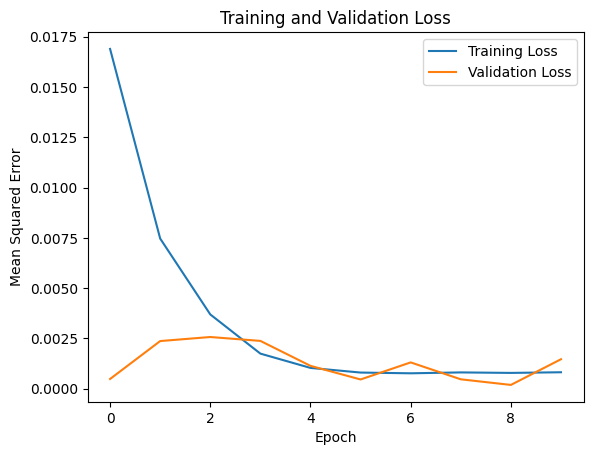

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [94]:
predictions = model.predict(x_test)
predictions_actual = scaler_target.inverse_transform(predictions)

171/171 [==============================] - 2s 11ms/step


In [95]:
y_test_reshaped = np.reshape(y_test, (-1, 1))
y_test_reshaped = scaler_target.inverse_transform(y_test_reshaped)

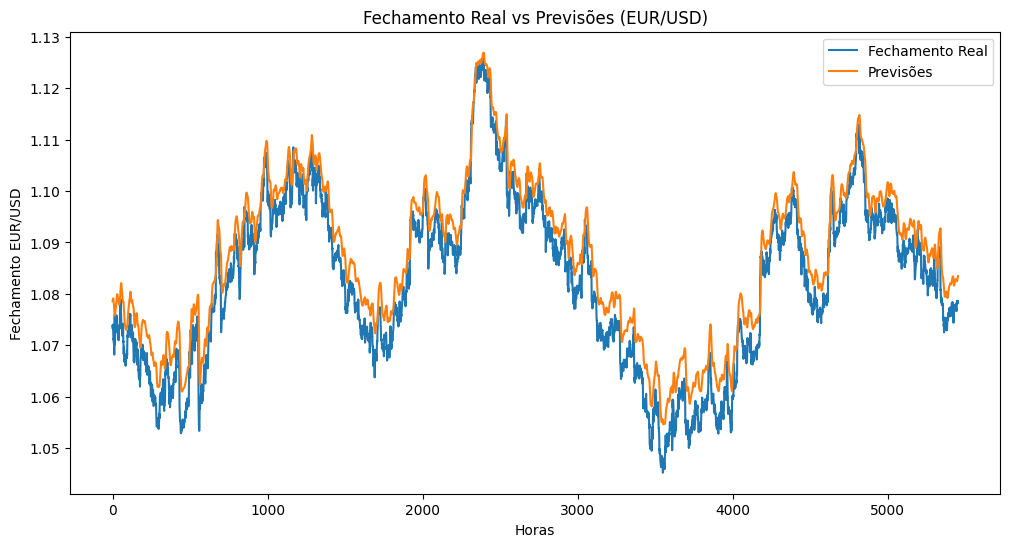

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Fechamento Real')
plt.plot(predictions_actual, label='Previsões')
plt.title('Fechamento Real vs Previsões (EUR/USD)')
plt.xlabel('Horas')
plt.ylabel('Fechamento EUR/USD')
plt.legend()
plt.show()

In [100]:
model.save('modelo_eurusd')

INFO:tensorflow:Assets written to: modelo_eurusd\assets


INFO:tensorflow:Assets written to: modelo_eurusd\assets
